# [Initial Environment]
- pandas getting started: https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html#
- 10 mins to pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#

In [59]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import sys
import os
sys.path.append(os.path.join(".."))
import libPython.core.util
import pandas as pd
pd.__version__

'1.3.5'

In [193]:
# create dataframe from diction list
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

print(f'df=\n{df}') #pandas dataframe
print(f'df["Age"]=\n{df["Age"]}') #一個pandas dataframe series等於是一個column

#Create a series
ages = pd.Series([22, 35, 58], name="Age")
print(f'ages=\n{ages}') 

#Do something
print(f"df['Age'].max()={df['Age'].max()}")
print(f"df['Age'].describe()=\n{df['Age'].describe()}")
df['Age'].describe()

# GroupBy
df.groupby('Sex')['Age'].mean()
df['Age'].count() #個數

df=
                       Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female
df["Age"]=
0    22
1    35
2    58
Name: Age, dtype: int64
ages=
0    22
1    35
2    58
Name: Age, dtype: int64
df['Age'].max()=58
df['Age'].describe()=
count     3.000000
mean     38.333333
std      18.230012
min      22.000000
25%      28.500000
50%      35.000000
75%      46.500000
max      58.000000
Name: Age, dtype: float64


RangeIndex(start=0, stop=3, step=1)

In [152]:
df = pd.read_excel(r"C:\Users\cloud\GoogleDrive\MyDOC-G\family folder - 家庭目錄\compare - real estate 房地產.xlsx", sheet_name=1)
df.dtypes
df.describe()
# df.info()

#...................................
# 選擇特定columns
#...................................
df['總價'] #'總價' column/pandas series]
df['總價'].shape #attribute containing the number of rows and columns: (nrows, ncolumns)
df.shape #attribute containing the number of rows and columns: (nrows, ncolumns)
df[['總價','主+陽']].head() #傳回一個data frame

#...................................
# 選擇特定rows
#...................................
df[df['總價']>2500]
is_2500=df['總價']==2500 #產生一個boolean series
df[(df['總價']>1000) & (df['總價']<2000)] #每個boolean式都要括號刮起來. $ (and), | (or)
df[df['本金'].notna()] #只有本金是valid data的row

#...................................
# 選擇特定 rows & columns
#...................................
df.loc[df['總價']>2500, '建案']
df.iloc[0:2,0:3] #iloc: index loc


,Unnamed: 0,建案,總價
0,NaN,梅竹B217 (2007),872
1,NaN,大無限13F,1988


In [182]:
import numpy as np
# create new column
df['New Col'] = df['總價']/1000

#修改每一個column (axis=0) / row (axis=1)
df.apply(lambda x: x, axis=0).head()
df['總價'].apply(np.sqrt)

df.rename(columns={'總價':'Total Money'}).head() #改變column名字

,Unnamed: 0,建案,Total Money,建坪 (權狀),主+陽,車位(P),車位 (萬),公設比,每坪(含車位),每坪(不含車位),...,出價(每坪),出價總價,落差(%),銀行鑑價,自備款(25%),貸款金額(75%),本金,利息,實際貸款成數,New Col
0,NaN,梅竹B217 (2007),872,52.90,30.53,5.00,150,0.362630,16.483932,15.073069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.872
1,NaN,大無限13F,1988,92.41,58.41,17.24,250,0.222961,21.512823,23.120926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.988
2,NaN,古根漢獨棟大地坪別墅,4680,178.40,178.40,0.00,0,0.000000,26.233184,26.233184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.680
3,NaN,甲山林4B2T(30p),1833,61.10,39.83,NaN,0,0.348118,30.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.833
4,NaN,甲山林4B3T(30p),2193,73.10,47.66,NaN,0,0.348016,30.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.193


In [ ]:
df.plot() #直接畫出（不支援中文字形)
df.plot.scatter(x='總價', y='主+陽')
df.plot.hist()
dir(df.plot) #秀出各種支援的圖形

In [7]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(df, x="建案", y="總價")
fig.show()

In [9]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df, x="總價", y="每坪(不含車位)")
fig.show()

   col 1  col 2 col 3 col 4  col 5
0      1     10     x     a      0
1      2     20     y     b      1
2      3     30     z     c      2
Index(['col 1', 'col 2', 'col 3', 'col 4', 'col 5'], dtype='object')
   col 1  col 2 col 3 col 4  col 5
0      1     10     x     a      0
1      2     20     y     b      1
2      3    -30     z     c      2


<AxesSubplot:>

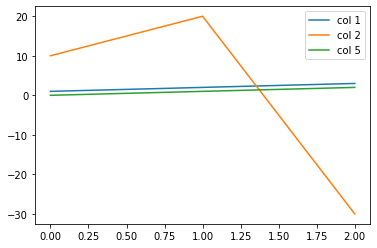

In [58]:
dic = {
    "col 1": [1, 2, 3], 
    "col 2": [10, 20, 30],
    "col 3": list('xyz'),
    "col 4": ['a', 'b', 'c'],
    "col 5": pd.Series(range(3))
}
df = pd.DataFrame(dic)
print(df)
print(df.columns)

# apply() 條件式改變所有value 
df["col 2"] = df["col 2"].apply(lambda x: x*-1 if x > 20 else x)
print(df)
df.plot()

In [52]:
print(f"df.columns={df.columns}")
print(f"df.columns[2:]={df.columns[2:]}")
df.columns=["col A",  "col B", "col C", "col D",  "col E",] #修改column名稱
print(f"df.columns={df.columns}")
df.columns=["col 1",  "col 2", "col 3", "col 4",  "col 5",]
# print(df['col 2'][0:1]) #???
print(df.loc[0:1]) #0~1 rows
print(df.loc[[0]])

df.columns=Index(['col 1', 'col 2', 'col 3', 'col 4', 'col 5'], dtype='object')
df.columns[2:]=Index(['col 3', 'col 4', 'col 5'], dtype='object')
df.columns=Index(['col A', 'col B', 'col C', 'col D', 'col E'], dtype='object')
   col 1  col 2 col 3 col 4  col 5
0      1     10     x     a      0
1      2     20     y     b      1
   col 1  col 2 col 3 col 4  col 5
0      1     10     x     a      0


In [5]:
rename_dic = {"col 1": "x", "col 2": "10x"}
df.rename(rename_dic, axis=1) #在 pandas 裡大部分函式預設處理的軸為列（row）：以 axis=0 表示；而將 axis 設置為 1 則代表你想以行（column）為單位套用該函式。

,x,10x,col 3,col 4,col 5
0,1,10,x,a,0
1,2,20,y,b,1
2,3,30,z,c,2


In [27]:
df = pd.read_clipboard()
print(df)
df.to_csv("out-pandas_data.csv")

Empty DataFrame
Columns: [import, plotly.graph_objects, as, go]
Index: []


In [21]:
df = pd.read_csv('http://bit.ly/kaggletrain')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
